### Assignment no. 07-01 Clustering-Hierarchical-Airlines-
##### Perform clustering (hierarchical) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

#### Data Description:

##### The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

##### ID --Unique ID

##### Balance--Number of miles eligible for award travel

##### Qual_mile--Number of miles counted as qualifying for Topflight status

##### cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months: cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months: cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

##### 1 = under 5,000 2 = 5,000 - 10,000 3 = 10,001 - 25,000 4 = 25,001 - 50,000 5 = over 50,000

##### Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

##### Bonus_trans--Number of non-flight bonus transactions in the past 12 months

##### Flight_miles_12mo--Number of flight miles in the past 12 months

##### Flight_trans_12--Number of flight transactions in the past 12 months

##### Days_since_enrolled--Number of days since enrolled in flier program

##### Award--whether that person had award flight (free flight) or not

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale 

In [2]:
# Import Dataset
df_air=pd.read_csv("/content/drive/MyDrive/Datasets/Clustering/EastWestAirlines.csv")
df_air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
### Drop column
df_airline=df_air.drop(["ID#",	"Award?"],axis=1)

In [4]:
df_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


In [5]:
df_airline.shape

(3999, 10)

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
dtypes: int64(10)
memory usage: 312.5 KB


#### THERE IS NO NULL VALUE

In [7]:
df_airline.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

### Scaling the data

In [8]:
df_airline_array=df_airline.values

In [9]:
df_airline_norm=scale(df_airline_array)

In [10]:
df_airline_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

### Hierarchical Clustering

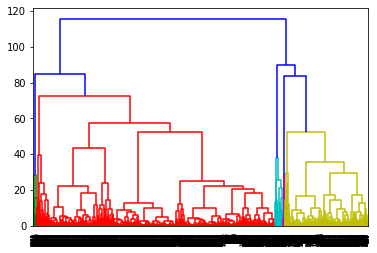

In [11]:
#### create dendrogram{method="ward"}
dendrogram=sch.dendrogram(sch.linkage(df_airline_norm, method="ward"))

#### Create Clusters

In [12]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [13]:
y_hc=hc.fit_predict(df_airline_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
import sklearn
sklearn.metrics.silhouette_score(df_airline_norm,y_hc)

0.32701816589484084

In [21]:
airlineH=df_air.copy()
airlineH["hcluster"]=y_hc
airlineH

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [22]:
airlineH["hcluster"].value_counts()

0    3980
2      15
1       4
Name: hcluster, dtype: int64

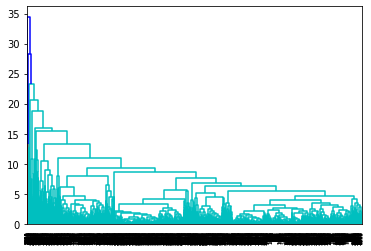

In [17]:
# create dendrogram{method="complete}
dendrogram=sch.dendrogram(sch.linkage(df_airline_norm, method="complete"))

In [18]:
#creating cluster
hc=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [19]:
y_hc=hc.fit_predict(df_airline_norm)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
import sklearn
sklearn.metrics.silhouette_score(df_airline_norm,y_hc)

0.7938964005121698

In [ ]:
airlineH=df_air.copy()
airlineH["hcluster"]=y_hc
airlineH

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
airlineH["hcluster"].value_counts()

0    3980
2      15
1       4
Name: hcluster, dtype: int64

#### n_cluster=5 the silhouette_score=0.32 
#### And 

#### n_cluster=3 the silhouette_score=0.79 
#### It's near to 1 it means the model is good

# KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
import  matplotlib.pyplot as plt

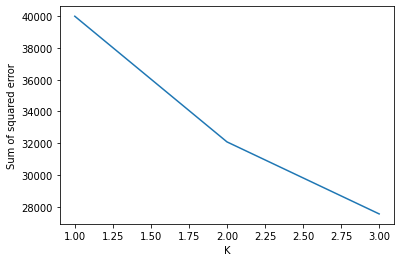

In [ ]:
sse=[]
k_rng =range(1,4)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit(df_airline_norm)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
model=KMeans(n_clusters=2,random_state=30).fit(df_airline_norm)
model.labels_ 

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
#### Assign clusters to the data set
airlinek=df_air.copy()
airlinek["kcluster"]=model.labels_ 
airlinek.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [ ]:
airlinek["kcluster"].value_counts()

1    2793
0    1206
Name: kcluster, dtype: int64

In [ ]:
sklearn.metrics.silhouette_score(df_airline_norm,model.labels_ )

0.35826638416515033

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.40,min_samples=11)
dbscan.fit(df_airline_norm)

DBSCAN(eps=0.4, min_samples=11)

In [ ]:
dbscan.labels_

array([ 0,  0,  0, ..., -1,  0,  0])

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(df_airline_norm,dbscan.labels_)

-0.12756459739485895

In [ ]:
dbscan=DBSCAN(eps=0.70,min_samples=5)
dbscan.fit(df_airline_norm)

DBSCAN(eps=0.7)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
airlineD=df_air.copy()
airlineD["dcluster"]=dbscan.labels_
airlineD.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,dcluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [ ]:
airlineD["dcluster"].value_counts()

 0     1940
-1      771
 1      506
 4      387
 2      235
 3      116
 6       15
 10       9
 7        6
 5        5
 8        5
 9        4
Name: dcluster, dtype: int64

In [ ]:
import sklearn
sklearn.metrics.silhouette_score(df_airline_norm,dbscan.labels_)

0.025151317808483207

#### Hierarchical & kmeans is having +ve comparing silhouette score & also it's closer to 1.

#### but, DBSCAN score for eps=40 and eps=70 silhoutte score is near to zero(overlaping cluster)